# FYP: Exploratory Data Analysis for Call Recordings
**FYP Goal:** Development of an AI/ML pipeline for pre-training a foundation model for sales

**EDA Goal:** Study the audio features of the Calls that led to an Appointment Set to determine the preprocessing steps required for calls

**Data Source:** After selecting an initial sample of 28 calls that led to appointments as an initial training set for the NLP model, we also supplied this data set to openSMILE for audio_feature extraction. We used the ComparE2016 benchmark to extract this feature set

### 1. Import Libraries
First, we import the necessary Python libraries required for our analysis.

In [1]:
import librosa
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pydub import AudioSegment
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

We also change the working directory

In [2]:
# change working directory to the root of your project
# Adjust according to the current path in the output
os.chdir('../')

### 2. Load the Dataset

In [3]:
openSmile_df = pd.read_csv('data/audio_features/batch1/audio_features.csv')

### 3. Data Analysis

#### Overview

In [4]:
openSmile_df.head()

,audspec_lengthL1norm_sma_range,audspec_lengthL1norm_sma_maxPos,audspec_lengthL1norm_sma_minPos,audspec_lengthL1norm_sma_quartile1,audspec_lengthL1norm_sma_quartile2,audspec_lengthL1norm_sma_quartile3,audspec_lengthL1norm_sma_iqr1-2,audspec_lengthL1norm_sma_iqr2-3,audspec_lengthL1norm_sma_iqr1-3,audspec_lengthL1norm_sma_percentile1.0,...,mfcc_sma_de[14]_peakRangeRel,mfcc_sma_de[14]_peakMeanAbs,mfcc_sma_de[14]_peakMeanMeanDist,mfcc_sma_de[14]_peakMeanRel,mfcc_sma_de[14]_minRangeRel,mfcc_sma_de[14]_meanRisingSlope,mfcc_sma_de[14]_stddevRisingSlope,mfcc_sma_de[14]_meanFallingSlope,mfcc_sma_de[14]_stddevFallingSlope,filename
0,5.751956,0.063385,0.0,0.194841,0.558589,1.078494,0.363748,0.519905,0.883653,0.026671,...,0.569127,2.609341,2.609122,20.0,0.564012,108.75248,57.968586,107.900370,58.417667,51216595236
1,5.457807,0.158545,0.0,0.152011,0.558068,1.135300,0.406056,0.577233,0.983289,0.024096,...,0.587765,2.711551,2.711486,20.0,0.571780,110.87448,59.064434,108.038080,58.478012,49694292797
2,5.771540,0.698567,0.0,0.200098,0.511530,1.292308,0.311431,0.780779,1.092210,0.020449,...,0.683297,2.550068,2.550052,20.0,0.552985,108.13338,59.350600,107.354880,58.390923,49757960881
3,5.797062,0.902072,0.0,0.124266,0.544983,1.110306,0.420716,0.565324,0.986040,0.027224,...,0.628485,2.567675,2.567441,20.0,0.569951,107.64390,58.014164,107.309265,57.741800,49438246243
4,5.609007,0.788159,0.0,0.034387,0.423701,1.223853,0.389314,0.800152,1.189466,0.019647,...,0.537238,2.668035,2.667830,20.0,0.563337,110.92630,63.770004,107.540085,62.195120,49685906542


#### Summary Statistics

In [5]:
openSmile_df.describe()

,audspec_lengthL1norm_sma_range,audspec_lengthL1norm_sma_maxPos,audspec_lengthL1norm_sma_minPos,audspec_lengthL1norm_sma_quartile1,audspec_lengthL1norm_sma_quartile2,audspec_lengthL1norm_sma_quartile3,audspec_lengthL1norm_sma_iqr1-2,audspec_lengthL1norm_sma_iqr2-3,audspec_lengthL1norm_sma_iqr1-3,audspec_lengthL1norm_sma_percentile1.0,...,mfcc_sma_de[14]_peakRangeRel,mfcc_sma_de[14]_peakMeanAbs,mfcc_sma_de[14]_peakMeanMeanDist,mfcc_sma_de[14]_peakMeanRel,mfcc_sma_de[14]_minRangeRel,mfcc_sma_de[14]_meanRisingSlope,mfcc_sma_de[14]_stddevRisingSlope,mfcc_sma_de[14]_meanFallingSlope,mfcc_sma_de[14]_stddevFallingSlope,filename
count,28.000000,28.000000,28.0,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,...,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,2.800000e+01
mean,5.616690,0.554158,0.0,0.133530,0.499381,1.143164,0.365851,0.643783,1.009634,0.021625,...,0.583105,2.695185,2.695044,15.714286,0.566950,109.773530,59.800413,108.440675,59.969145,5.014828e+10
std,0.660249,0.301354,0.0,0.056740,0.072900,0.108387,0.056052,0.081312,0.110840,0.003692,...,0.046294,0.192081,0.192099,12.598816,0.049019,4.967152,3.617840,4.667154,3.671067,7.245276e+08
min,4.157152,0.063385,0.0,0.034387,0.343853,0.925957,0.261278,0.515131,0.776409,0.015784,...,0.477994,2.185277,2.185112,-20.000000,0.483240,98.891716,51.993580,98.787870,50.529050,4.920155e+10
25%,5.355350,0.267477,0.0,0.099907,0.462370,1.103686,0.331934,0.588129,0.917636,0.019955,...,0.558022,2.596892,2.597003,20.000000,0.529919,107.643123,57.605171,106.105578,58.039928,4.956546e+10
50%,5.600396,0.607182,0.0,0.121263,0.498253,1.160960,0.369565,0.626514,1.010754,0.020274,...,0.578257,2.681433,2.681318,20.000000,0.570866,108.957995,58.998989,107.720227,59.209798,4.982970e+10
75%,5.802387,0.807854,0.0,0.163810,0.558198,1.208049,0.401839,0.695573,1.100696,0.023171,...,0.622865,2.797548,2.797047,20.000000,0.598071,112.780845,62.268250,109.944370,62.087009,5.062917e+10
max,8.004126,0.974477,0.0,0.301012,0.639122,1.374313,0.481616,0.800152,1.254860,0.030379,...,0.683297,3.010903,3.010840,20.000000,0.662961,119.681740,66.445010,119.865820,66.766690,5.138391e+10


#### Missing Values

In [6]:
missing_values = openSmile_df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


Great! No missing values

#### Feature Correlation Analysis

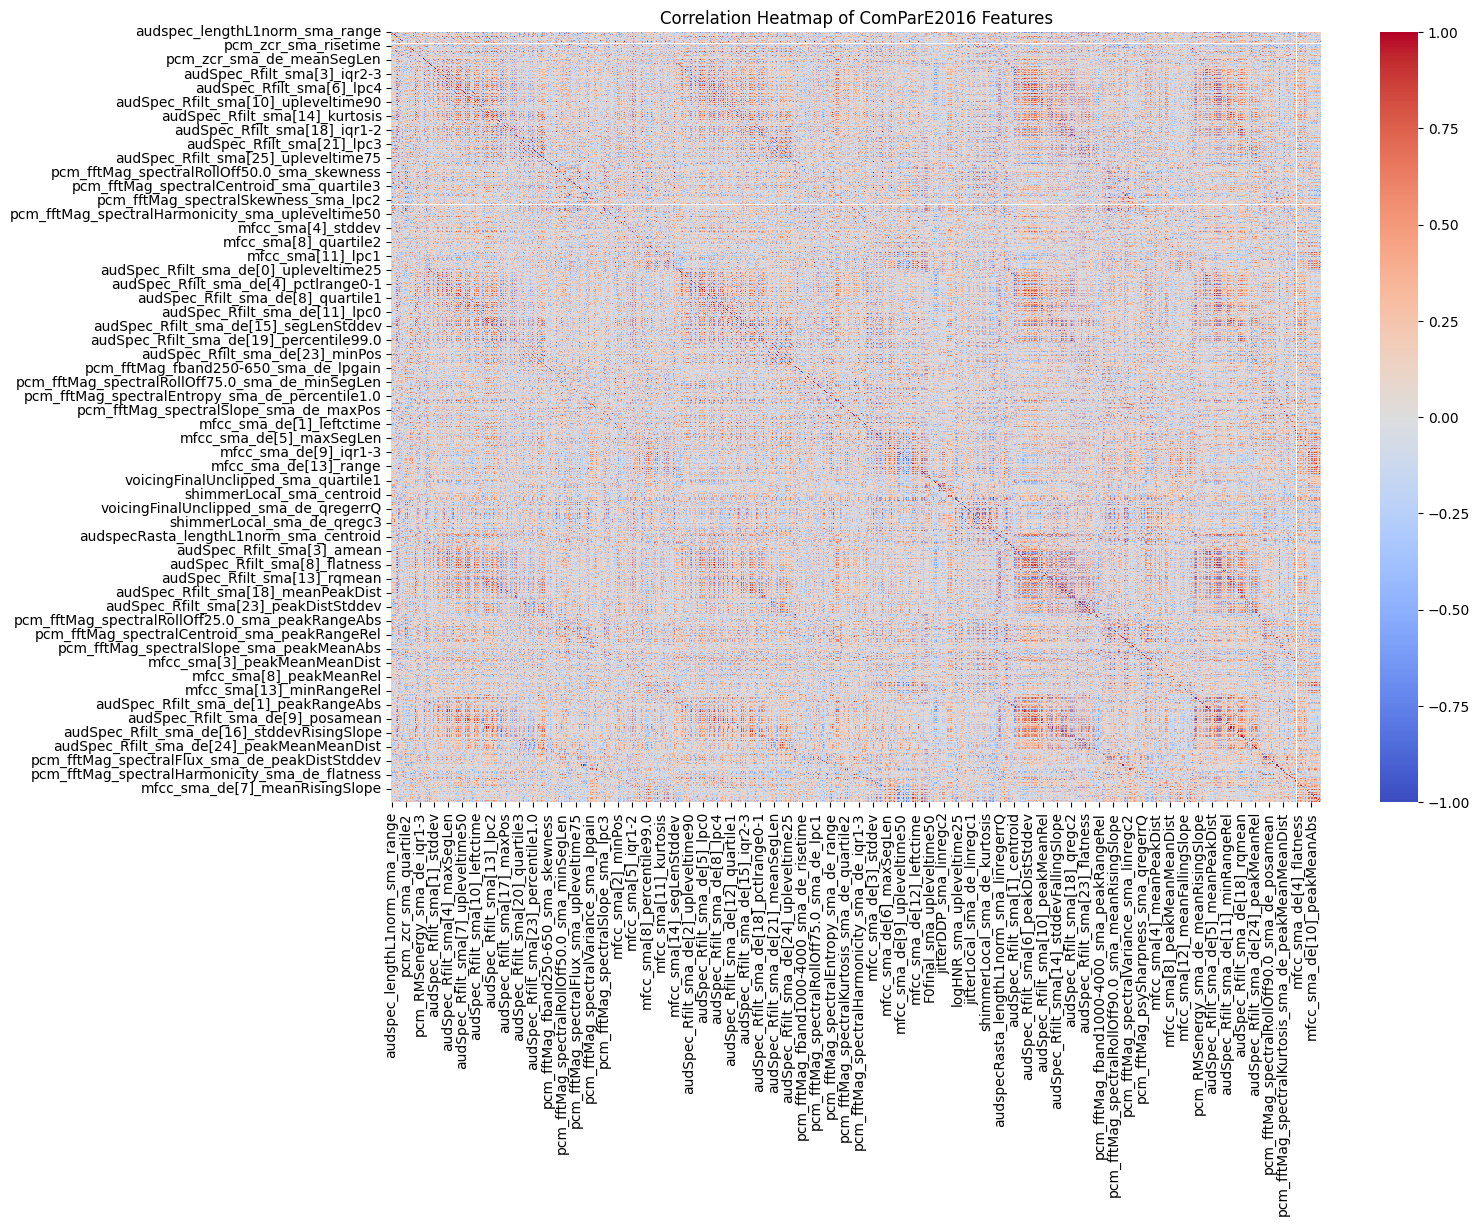

In [7]:
# Correlation matrix
correlation_matrix = openSmile_df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of ComParE2016 Features")
plt.show()

heat map shows that there are "hotspots". We can focus on these hot spots and negate the rest

#### Principal Component Analysis (PCA)

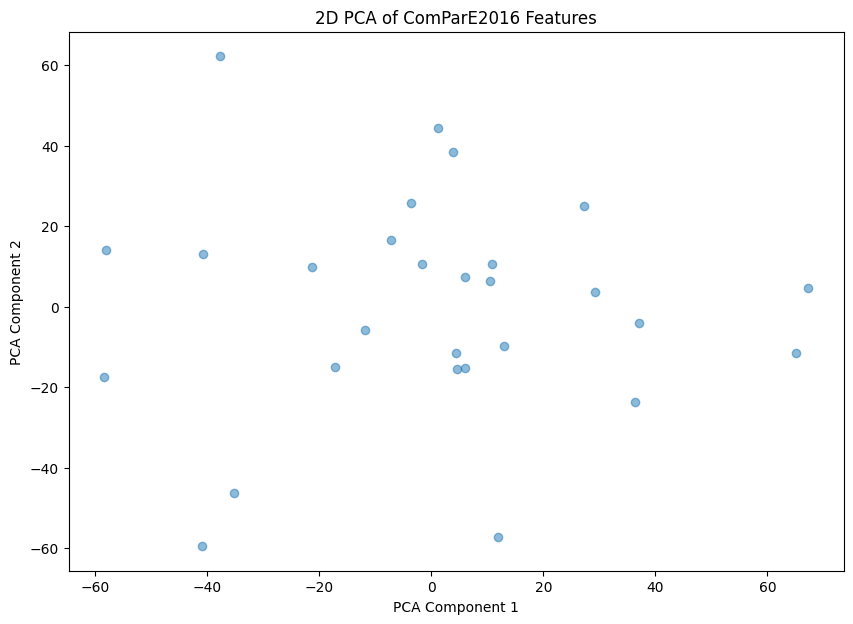

In [8]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(openSmile_df)

# PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

# Plot the 2D PCA result
plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("2D PCA of ComParE2016 Features")
plt.show()

PCA shows some clustering between the -20 to 20 region. We can focus on this region

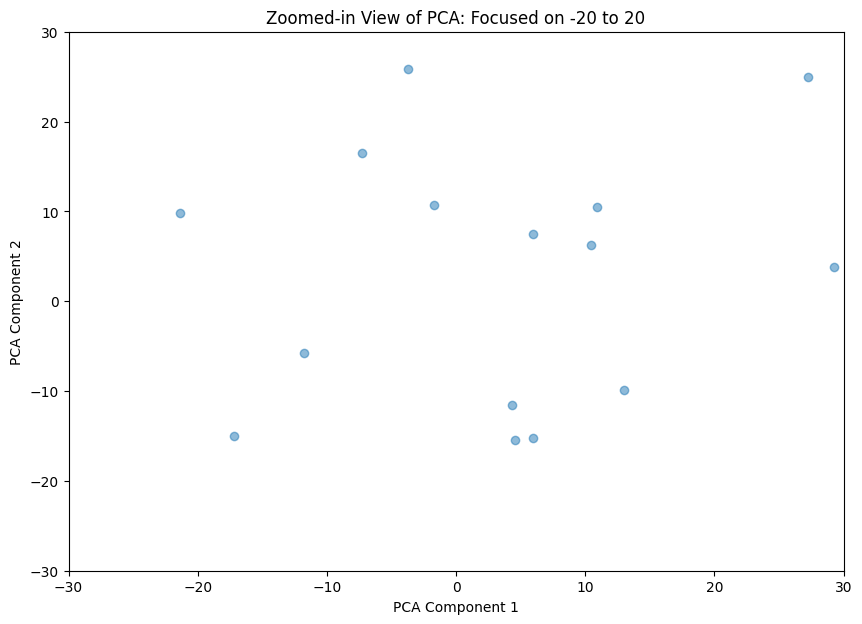

In [9]:
# Plot with adjusted axis limits to focus on the -20 to 20 range
plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.xlim(-30, 30)
plt.ylim(-30, 30)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Zoomed-in View of PCA: Focused on -20 to 20")
plt.show()

#### Variance Thresholding

In [10]:
# Set a variance threshold (e.g., 0.01) to filter out low-variance features
selector = VarianceThreshold(threshold=3)
high_variance_features = selector.fit_transform(openSmile_df)
selected_features = openSmile_df.columns[selector.get_support()]

# Filter the DataFrame to include only high-variance features
important_features_df = openSmile_df[selected_features]

In [11]:
important_features_df

,audspec_lengthL1norm_sma_meanSegLen,audspec_lengthL1norm_sma_maxSegLen,audspec_lengthL1norm_sma_minSegLen,audspecRasta_lengthL1norm_sma_range,audspecRasta_lengthL1norm_sma_percentile99.0,audspecRasta_lengthL1norm_sma_pctlrange0-1,audspecRasta_lengthL1norm_sma_kurtosis,audspecRasta_lengthL1norm_sma_meanSegLen,audspecRasta_lengthL1norm_sma_maxSegLen,audspecRasta_lengthL1norm_sma_minSegLen,...,mfcc_sma_de[13]_stddevRisingSlope,mfcc_sma_de[13]_meanFallingSlope,mfcc_sma_de[13]_stddevFallingSlope,mfcc_sma_de[14]_peakRangeAbs,mfcc_sma_de[14]_peakMeanRel,mfcc_sma_de[14]_meanRisingSlope,mfcc_sma_de[14]_stddevRisingSlope,mfcc_sma_de[14]_meanFallingSlope,mfcc_sma_de[14]_stddevFallingSlope,filename
0,5.186747,9.840000,4.350000,41.070045,7.015028,6.682016,136.661420,15.422500,76.170000,4.92,...,67.510910,126.201920,66.262920,12.141535,20.0,108.752480,57.968586,107.900370,58.417667,51216595236
1,5.204070,22.170000,4.490000,44.082500,8.773696,8.523566,79.935585,14.705999,66.030000,4.59,...,65.485940,126.977066,68.108920,13.734796,20.0,110.874480,59.064434,108.038080,58.478012,49694292797
2,3.466625,15.360000,2.780000,33.501500,7.802646,7.578965,77.973370,9.001667,37.790000,2.93,...,64.130880,119.737850,66.431210,14.506641,20.0,108.133380,59.350600,107.354880,58.390923,49757960881
3,2.962615,13.230000,1.930000,45.098946,9.643787,9.417144,101.491325,8.751818,29.300000,2.02,...,63.107018,115.958080,64.620740,12.779436,20.0,107.643900,58.014164,107.309265,57.741800,49438246243
4,2.448824,25.930000,1.690000,53.183872,14.799257,14.625160,84.200760,6.296153,25.340000,1.96,...,73.774376,119.205444,70.891710,12.250822,20.0,110.926300,63.770004,107.540085,62.195120,49685906542
5,2.663026,16.490000,2.030000,43.881992,10.848579,10.648098,75.989980,6.852500,30.580000,2.03,...,68.267334,122.185455,66.446070,13.356984,20.0,111.014080,58.159286,109.215020,61.009037,49827827248
6,3.311039,8.889999,2.570000,32.722248,7.739093,7.495620,77.362320,9.176666,24.289999,2.76,...,65.765620,119.728230,65.533510,11.824848,20.0,112.973340,61.714820,110.182330,63.173634,50517723171
7,3.672410,18.480000,3.070000,31.363094,9.690790,9.437594,40.521755,6.179796,19.710000,3.07,...,66.477630,125.247030,68.760090,13.510896,20.0,115.859910,64.137650,114.792510,66.766690,49514031514
8,3.376704,6.020000,3.000000,79.678640,10.087593,9.899951,224.424260,25.653000,75.720000,4.36,...,73.508530,126.874210,75.305800,14.105716,20.0,114.687960,66.385330,114.863210,66.666390,51279224333
9,7.170219,21.800000,6.520000,67.432530,14.978605,14.821664,78.705600,12.991600,28.900000,6.53,...,67.936130,116.937330,69.260470,11.609671,20.0,107.836464,58.509712,107.172010,59.567547,51287773489


#### PCA Based Dimensionality Reduction

In [12]:
# Apply PCA to the feature set
pca = PCA(n_components=28)  # Adjust `n_components` based on how many features you want
pca_result = pca.fit_transform(important_features_df)

# Get the most important features based on PCA components
important_features = [openSmile_df.columns[i] for i in np.argsort(-pca.components_[0])[:10]]
important_features_df = openSmile_df[important_features]

In [13]:
important_features_df

,audSpec_Rfilt_sma[3]_lpc1,audSpec_Rfilt_sma[18]_skewness,pcm_fftMag_spectralRollOff90.0_sma_lpgain,pcm_fftMag_spectralRollOff90.0_sma_lpc0,pcm_fftMag_spectralRollOff90.0_sma_lpc1,pcm_fftMag_spectralRollOff90.0_sma_lpc2,mfcc_sma[5]_minPos,mfcc_sma[5]_quartile1,mfcc_sma[5]_range,mfcc_sma[5]_maxPos
0,3.511456,5.454814,41999.850,-1.683952,0.658423,0.528401,0.990274,-42.185623,152.14204,0.332790
1,3.289842,8.563002,56308.074,-1.685506,0.672982,0.499626,0.228344,-44.173817,150.53390,0.396072
2,3.866279,8.128363,52328.210,-1.572834,0.544497,0.500638,0.143909,-53.444176,147.14134,0.072601
3,3.661888,6.230735,71082.570,-1.633444,0.617156,0.475485,0.868541,-50.343422,156.01997,0.821011
4,3.390081,8.243791,56897.330,-1.558234,0.506410,0.528232,0.688615,-40.829903,176.12240,0.907768
5,3.606721,5.569048,55098.360,-1.581328,0.551682,0.472442,0.373363,-46.327465,138.79218,0.438533
6,3.314742,7.597450,45754.180,-1.649517,0.643284,0.462125,0.172194,-45.554985,137.77667,0.628726
7,3.934705,5.353437,51088.100,-1.638757,0.625736,0.485212,0.893301,-49.892296,134.56874,0.098529
8,3.078204,10.408086,39004.027,-1.702708,0.700803,0.474531,0.781492,-53.136063,162.12561,0.514105
9,3.684494,7.838973,52711.777,-1.709773,0.700911,0.494484,0.928163,-52.486385,145.30700,0.086566


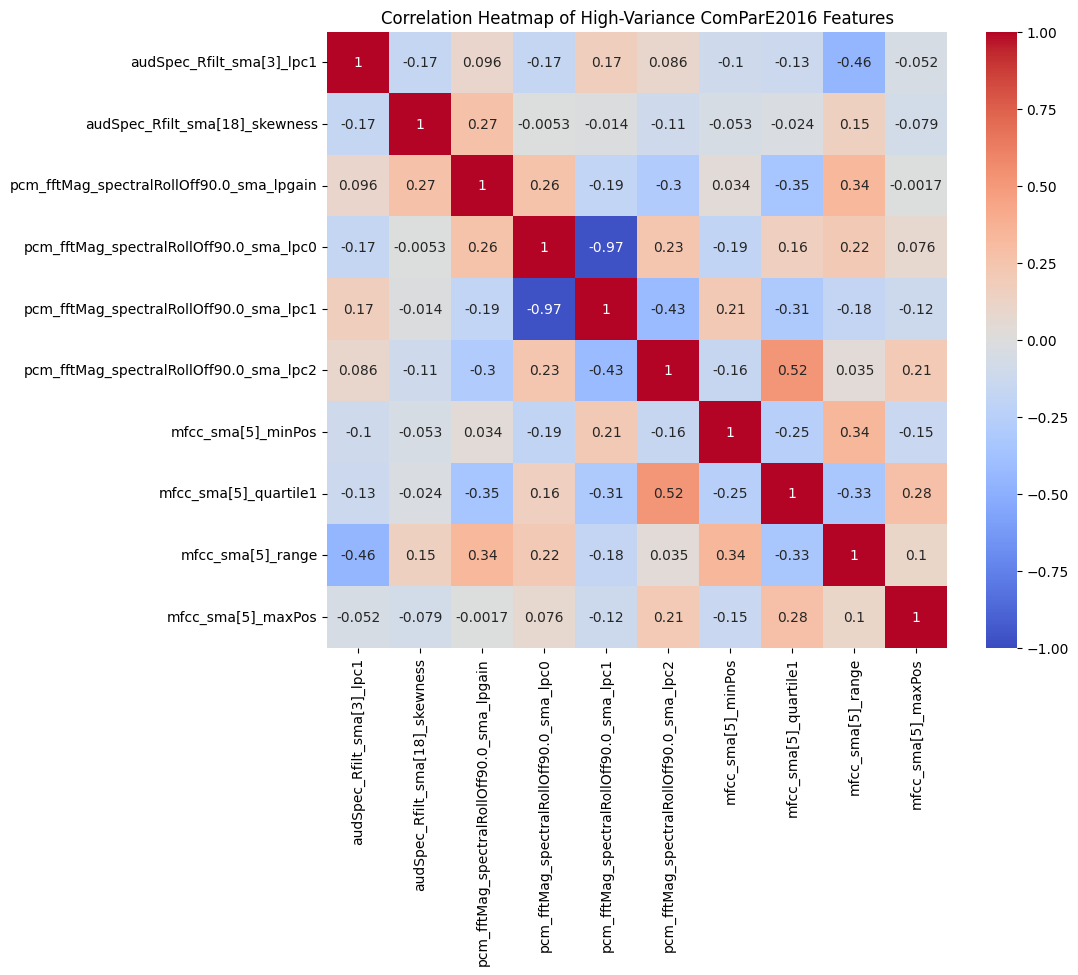

In [14]:
# Calculate the correlation matrix for selected important features
correlation_matrix = important_features_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, vmin=-1, vmax=1)
plt.title("Correlation Heatmap of High-Variance ComParE2016 Features")
plt.show()